## Flight Cancellation Prediction

Given *data about US flights in 2015*, let's try to predict whether a given flight will be **cancelled**.

We will use a logistic regression model to make our predictions.

Data source: https://www.kaggle.com/datasets/usdot/flight-delays

### Importing Libraries

In [4]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

In [5]:
data = pd.read_csv('archive/flights.csv', nrows=50000)
data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2015,1,4,7,AA,1524,N499AA,DFW,LAS,915,910.0,-5.0,24.0,934.0,175,180.0,150.0,1055,1004.0,6.0,1010,1010.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
49996,2015,1,4,7,AA,2316,N3FNAA,STX,MIA,915,915.0,0.0,20.0,935.0,187,191.0,155.0,1139,1110.0,16.0,1122,1126.0,4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
49997,2015,1,4,7,AS,5,N566AS,DCA,LAX,915,952.0,37.0,13.0,1005.0,355,355.0,329.0,2311,1234.0,13.0,1210,1247.0,37.0,0,0,NaN,37.0,0.0,0.0,0.0,0.0
49998,2015,1,4,7,DL,688,N893AT,ATL,ICT,915,922.0,7.0,13.0,935.0,145,135.0,115.0,782,1030.0,7.0,1040,1037.0,-3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 50000 non-null  int64  
 1   MONTH                50000 non-null  int64  
 2   DAY                  50000 non-null  int64  
 3   DAY_OF_WEEK          50000 non-null  int64  
 4   AIRLINE              50000 non-null  object 
 5   FLIGHT_NUMBER        50000 non-null  int64  
 6   TAIL_NUMBER          49941 non-null  object 
 7   ORIGIN_AIRPORT       50000 non-null  object 
 8   DESTINATION_AIRPORT  50000 non-null  object 
 9   SCHEDULED_DEPARTURE  50000 non-null  int64  
 10  DEPARTURE_TIME       48896 non-null  float64
 11  DEPARTURE_DELAY      48896 non-null  float64
 12  TAXI_OUT             48873 non-null  float64
 13  WHEELS_OFF           48873 non-null  float64
 14  SCHEDULED_TIME       50000 non-null  int64  
 15  ELAPSED_TIME         48753 non-null 

### Preprocessing

In [10]:
df = data.copy()

In [13]:
df.isna().mean() * 100

YEAR                    0.000
MONTH                   0.000
DAY                     0.000
DAY_OF_WEEK             0.000
AIRLINE                 0.000
FLIGHT_NUMBER           0.000
TAIL_NUMBER             0.118
ORIGIN_AIRPORT          0.000
DESTINATION_AIRPORT     0.000
SCHEDULED_DEPARTURE     0.000
DEPARTURE_TIME          2.208
DEPARTURE_DELAY         2.208
TAXI_OUT                2.254
WHEELS_OFF              2.254
SCHEDULED_TIME          0.000
ELAPSED_TIME            2.494
AIR_TIME                2.494
DISTANCE                0.000
WHEELS_ON               2.322
TAXI_IN                 2.322
SCHEDULED_ARRIVAL       0.000
ARRIVAL_TIME            2.322
ARRIVAL_DELAY           2.494
DIVERTED                0.000
CANCELLED               0.000
CANCELLATION_REASON    97.724
AIR_SYSTEM_DELAY       69.184
SECURITY_DELAY         69.184
AIRLINE_DELAY          69.184
LATE_AIRCRAFT_DELAY    69.184
WEATHER_DELAY          69.184
dtype: float64

In [17]:
# Remove columns with more than 25% missing values
missing_columns = df.loc[:, df.isna().mean() >= 0.25].columns
df = df.drop(missing_columns, axis=1)

In [19]:
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2015,1,4,7,AA,1524,N499AA,DFW,LAS,915,910.0,-5.0,24.0,934.0,175,180.0,150.0,1055,1004.0,6.0,1010,1010.0,0.0,0,0
49996,2015,1,4,7,AA,2316,N3FNAA,STX,MIA,915,915.0,0.0,20.0,935.0,187,191.0,155.0,1139,1110.0,16.0,1122,1126.0,4.0,0,0
49997,2015,1,4,7,AS,5,N566AS,DCA,LAX,915,952.0,37.0,13.0,1005.0,355,355.0,329.0,2311,1234.0,13.0,1210,1247.0,37.0,0,0
49998,2015,1,4,7,DL,688,N893AT,ATL,ICT,915,922.0,7.0,13.0,935.0,145,135.0,115.0,782,1030.0,7.0,1040,1037.0,-3.0,0,0


In [18]:
df.isna().sum()

YEAR                      0
MONTH                     0
DAY                       0
DAY_OF_WEEK               0
AIRLINE                   0
FLIGHT_NUMBER             0
TAIL_NUMBER              59
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
SCHEDULED_DEPARTURE       0
DEPARTURE_TIME         1104
DEPARTURE_DELAY        1104
TAXI_OUT               1127
WHEELS_OFF             1127
SCHEDULED_TIME            0
ELAPSED_TIME           1247
AIR_TIME               1247
DISTANCE                  0
WHEELS_ON              1161
TAXI_IN                1161
SCHEDULED_ARRIVAL         0
ARRIVAL_TIME           1161
ARRIVAL_DELAY          1247
DIVERTED                  0
CANCELLED                 0
dtype: int64

In [20]:
{column: len(df[column].unique()) for column in df.columns}

{'YEAR': 1,
 'MONTH': 1,
 'DAY': 4,
 'DAY_OF_WEEK': 4,
 'AIRLINE': 14,
 'FLIGHT_NUMBER': 5700,
 'TAIL_NUMBER': 4087,
 'ORIGIN_AIRPORT': 312,
 'DESTINATION_AIRPORT': 311,
 'SCHEDULED_DEPARTURE': 1116,
 'DEPARTURE_TIME': 1318,
 'DEPARTURE_DELAY': 402,
 'TAXI_OUT': 122,
 'WHEELS_OFF': 1324,
 'SCHEDULED_TIME': 417,
 'ELAPSED_TIME': 486,
 'AIR_TIME': 464,
 'DISTANCE': 1232,
 'WHEELS_ON': 1384,
 'TAXI_IN': 87,
 'SCHEDULED_ARRIVAL': 1272,
 'ARRIVAL_TIME': 1382,
 'ARRIVAL_DELAY': 424,
 'DIVERTED': 2,
 'CANCELLED': 2}

In [21]:
# Drop unneeded columns
df = df.drop(['YEAR', 'MONTH', 'FLIGHT_NUMBER', 'TAIL_NUMBER'], axis=1)

In [22]:
df

,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,1,4,AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,1,4,AA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,1,4,US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,1,4,AA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,1,4,AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,4,7,AA,DFW,LAS,915,910.0,-5.0,24.0,934.0,175,180.0,150.0,1055,1004.0,6.0,1010,1010.0,0.0,0,0
49996,4,7,AA,STX,MIA,915,915.0,0.0,20.0,935.0,187,191.0,155.0,1139,1110.0,16.0,1122,1126.0,4.0,0,0
49997,4,7,AS,DCA,LAX,915,952.0,37.0,13.0,1005.0,355,355.0,329.0,2311,1234.0,13.0,1210,1247.0,37.0,0,0
49998,4,7,DL,ATL,ICT,915,922.0,7.0,13.0,935.0,145,135.0,115.0,782,1030.0,7.0,1040,1037.0,-3.0,0,0


In [23]:
def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix, dtype=int)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [24]:
# One-hot encode nominal feature columns
df = onehot_encode(df,
                  column_dict={
                      'AIRLINE': 'AL',
                      'ORIGIN_AIRPORT': 'OA',
                      'DESTINATION_AIRPORT': 'DA'
                  })

In [25]:
df

,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AL_AA,AL_AS,AL_B6,AL_DL,AL_EV,AL_F9,AL_HA,AL_MQ,AL_NK,AL_OO,AL_UA,AL_US,AL_VX,AL_WN,OA_ABE,OA_ABI,OA_ABQ,OA_ABR,OA_ABY,OA_ACT,OA_ACV,OA_ACY,OA_ADK,OA_ADQ,OA_AEX,OA_AGS,OA_ALB,OA_ALO,OA_AMA,OA_ANC,OA_APN,OA_ASE,OA_ATL,OA_ATW,OA_AUS,OA_AVL,OA_AVP,OA_AZO,OA_BDL,OA_BET,OA_BFL,OA_BHM,OA_BIL,OA_BIS,OA_BJI,OA_BLI,OA_BMI,OA_BNA,OA_BOI,OA_BOS,OA_BPT,OA_BQK,OA_BQN,OA_BRD,OA_BRO,OA_BRW,OA_BTM,OA_BTR,OA_BTV,OA_BUF,OA_BUR,OA_BWI,OA_BZN,OA_CAE,OA_CAK,OA_CDC,OA_CDV,OA_CEC,OA_CHA,OA_CHO,OA_CHS,OA_CID,OA_CIU,OA_CLD,OA_CLE,OA_CLL,OA_CLT,OA_CMH,OA_CMI,OA_CMX,OA_CNY,OA_COD,OA_COS,OA_COU,OA_CPR,OA_CRP,OA_CRW,OA_CSG,OA_CVG,OA_CWA,OA_DAB,OA_DAL,OA_DAY,OA_DBQ,OA_DCA,OA_DEN,OA_DFW,OA_DHN,OA_DIK,OA_DLH,OA_DRO,OA_DSM,OA_DTW,OA_DVL,OA_EAU,OA_ECP,OA_EGE,OA_EKO,OA_ELM,OA_ELP,OA_ERI,OA_ESC,OA_EUG,OA_EVV,OA_EWN,OA_EWR,OA_EYW,OA_FAI,OA_FAR,OA_FAT,OA_FAY,OA_FCA,OA_FLG,OA_FLL,OA_FNT,OA_FSD,OA_FSM,OA_FWA,OA_GCC,OA_GCK,OA_GEG,OA_GFK,OA_GGG,OA_GJT,OA_GNV,OA_GPT,OA_GRB,OA_GRI,OA_GRK,OA_GRR,OA_GSO,OA_GSP,OA_GTF,OA_GTR,OA_GUC,OA_GUM,OA_HDN,OA_HIB,OA_HLN,OA_HNL,OA_HOB,OA_HOU,OA_HPN,OA_HRL,OA_HSV,OA_HYS,OA_IAD,OA_IAG,OA_IAH,OA_ICT,OA_IDA,OA_ILG,OA_ILM,OA_IMT,OA_IND,OA_INL,OA_ISN,OA_ISP,OA_ITO,OA_JAC,OA_JAN,OA_JAX,OA_JFK,OA_JLN,OA_JMS,OA_JNU,OA_KOA,OA_KTN,OA_LAN,OA_LAR,OA_LAS,OA_LAW,OA_LAX,OA_LBB,OA_LBE,OA_LCH,OA_LEX,OA_LFT,OA_LGA,OA_LGB,OA_LIH,OA_LIT,OA_LNK,OA_LRD,OA_LSE,OA_LWS,OA_MAF,OA_MBS,OA_MCI,OA_MCO,OA_MDT,OA_MDW,OA_MEI,OA_MEM,OA_MFE,OA_MFR,OA_MGM,OA_MHK,OA_MHT,OA_MIA,OA_MKE,OA_MKG,OA_MLB,OA_MLI,OA_MLU,OA_MMH,OA_MOB,OA_MOT,OA_MQT,OA_MRY,OA_MSN,OA_MSO,OA_MSP,OA_MSY,OA_MTJ,OA_MYR,OA_OAJ,OA_OAK,OA_OGG,OA_OKC,OA_OMA,OA_OME,OA_ONT,OA_ORD,OA_ORF,OA_ORH,OA_OTH,OA_OTZ,OA_PAH,OA_PBG,OA_PBI,OA_PDX,OA_PHF,OA_PHL,OA_PHX,OA_PIA,OA_PIB,OA_PIH,OA_PIT,OA_PLN,OA_PNS,OA_PPG,OA_PSC,OA_PSE,OA_PSG,OA_PSP,OA_PUB,OA_PVD,OA_PWM,OA_RAP,OA_RDD,OA_RDM,OA_RDU,OA_RHI,OA_RIC,OA_RKS,OA_RNO,OA_ROA,OA_ROC,OA_ROW,OA_RST,OA_RSW,OA_SAF,OA_SAN,OA_SAT,OA_SAV,OA_SBA,OA_SBN,OA_SBP,OA_SCC,OA_SCE,OA_SDF,OA_SEA,OA_SFO,OA_SGF,OA_SGU,OA_SHV,OA_SIT,OA_SJC,OA_SJT,OA_SJU,OA_SLC,OA_SMF,OA_SMX,OA_SNA,OA_SPI,OA_SPS,OA_SRQ,OA_STC,OA_STL,OA_STT,OA_STX,OA_SUN,OA_SUX,OA_SWF,OA_SYR,OA_TLH,OA_TOL,OA_TPA,OA_TRI,OA_TTN,OA_TUL,OA_TUS,OA_TVC,OA_TWF,OA_TXK,OA_TYR,OA_TYS,OA_UST,OA_VEL,OA_VLD,OA_VPS,OA_WRG,OA_XNA,OA_YAK,OA_YUM,DA_ABE,DA_ABI,DA_ABQ,DA_ABR,DA_ABY,DA_ACT,DA_ACV,DA_ACY,DA_ADK,DA_ADQ,DA_AEX,DA_AGS,DA_ALB,DA_ALO,DA_AMA,DA_ANC,DA_APN,DA_ASE,DA_ATL,DA_ATW,DA_AUS,DA_AVL,DA_AVP,DA_AZO,DA_BDL,DA_BET,DA_BFL,DA_BHM,DA_BIL,DA_BIS,DA_BJI,DA_BLI,DA_BMI,DA_BNA,DA_BOI,DA_BOS,DA_BPT,DA_BQK,DA_BQN,DA_BRD,DA_BRO,DA_BRW,DA_BTM,DA_BTR,DA_BTV,DA_BUF,DA_BUR,DA_BWI,DA_BZN,DA_CAE,DA_CAK,DA_CDC,DA_CDV,DA_CEC,DA_CHA,DA_CHO,DA_CHS,DA_CID,DA_CIU,DA_CLD,DA_CLE,DA_CLL,DA_CLT,DA_CMH,DA_CMI,DA_CMX,DA_CNY,DA_COD,DA_COS,DA_COU,DA_CPR,DA_CRP,DA_CRW,DA_CSG,DA_CVG,DA_CWA,DA_DAB,DA_DAL,DA_DAY,DA_DBQ,DA_DCA,DA_DEN,DA_DFW,DA_DHN,DA_DIK,DA_DLH,DA_DRO,DA_DSM,DA_DTW,DA_DVL,DA_EAU,DA_ECP,DA_EGE,DA_EKO,DA_ELM,DA_ELP,DA_ERI,DA_ESC,DA_EUG,DA_EVV,DA_EWN,DA_EWR,DA_EYW,DA_FAI,DA_FAR,DA_FAT,DA_FAY,DA_FCA,DA_FLG,DA_FLL,DA_FNT,DA_FSD,DA_FSM,DA_FWA,DA_GCC,DA_GCK,DA_GEG,DA_GGG,DA_GJT,DA_GNV,DA_GPT,DA_GRB,DA_GRI,DA_GRK,DA_GRR,DA_GSO,DA_GSP,DA_GTF,DA_GTR,DA_GUC,DA_GUM,DA_HDN,DA_HIB,DA_HLN,DA_HNL,DA_HOB,DA_HOU,DA_HPN,DA_HRL,DA_HSV,DA_HYS,DA_IAD,DA_IAG,DA_IAH,DA_ICT,DA_IDA,DA_ILG,DA_ILM,DA_IMT,DA_IND,DA_INL,DA_ISN,DA_ISP,DA_ITO,DA_JAC,DA_JAN,DA_JAX,DA_JFK,DA_JLN,DA_JMS,DA_JNU,DA_KOA,DA_KTN,DA_LAN,DA_LAR,DA_LAS,DA_LAW,DA_LAX,DA_LBB,DA_LBE,DA_LCH,DA_LEX,DA_LFT,DA_LGA,DA_LGB,DA_LIH,DA_LIT,DA_LNK,DA_LRD,DA_LSE,DA_LWS,DA_MAF,DA_MBS,DA_MCI,DA_MCO,DA_MDT,DA_MDW,DA_MEI,DA_MEM,DA_MFE,DA_MFR,DA_MGM,DA_MHK,DA_MHT,DA_MIA,DA_MKE,DA_MKG,DA_MLB,DA_MLI,DA_MLU,DA_MMH,DA_MOB,DA_MOT,DA_MQT,DA_MRY,DA_MSN,DA_MSO,DA_MSP,DA_MSY,DA_MTJ,DA_MYR,DA_OAJ,DA_OAK,DA_OGG,DA_OKC,DA_OMA,DA_O

In [32]:
df.loc[:, df.isna().sum() > 0]

,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,ELAPSED_TIME,AIR_TIME,WHEELS_ON,TAXI_IN,ARRIVAL_TIME,ARRIVAL_DELAY
0,2354.0,-11.0,21.0,15.0,194.0,169.0,404.0,4.0,408.0,-22.0
1,2.0,-8.0,12.0,14.0,279.0,263.0,737.0,4.0,741.0,-9.0
2,18.0,-2.0,16.0,34.0,293.0,266.0,800.0,11.0,811.0,5.0
3,15.0,-5.0,15.0,30.0,281.0,258.0,748.0,8.0,756.0,-9.0
4,24.0,-1.0,11.0,35.0,215.0,199.0,254.0,5.0,259.0,-21.0
...,...,...,...,...,...,...,...,...,...,...
49995,910.0,-5.0,24.0,934.0,180.0,150.0,1004.0,6.0,1010.0,0.0
49996,915.0,0.0,20.0,935.0,191.0,155.0,1110.0,16.0,1126.0,4.0
49997,952.0,37.0,13.0,1005.0,355.0,329.0,1234.0,13.0,1247.0,37.0
49998,922.0,7.0,13.0,935.0,135.0,115.0,1030.0,7.0,1037.0,-3.0


In [33]:
# Fill remaining missing values with column means
remaining_na_columns = df.loc[:, df.isna().sum() > 0].columns
for column in remaining_na_columns:
    df[column] = df[column].fillna(df[column].mean())

In [34]:
df.isna().sum().sum()

np.int64(0)

In [36]:
# Split df into X and y
y = df['CANCELLED'].copy()
X = df.drop('CANCELLED', axis=1).copy()

In [37]:
y

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: CANCELLED, Length: 50000, dtype: int64

In [38]:
X

,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,AL_AA,AL_AS,AL_B6,AL_DL,AL_EV,AL_F9,AL_HA,AL_MQ,AL_NK,AL_OO,AL_UA,AL_US,AL_VX,AL_WN,OA_ABE,OA_ABI,OA_ABQ,OA_ABR,OA_ABY,OA_ACT,OA_ACV,OA_ACY,OA_ADK,OA_ADQ,OA_AEX,OA_AGS,OA_ALB,OA_ALO,OA_AMA,OA_ANC,OA_APN,OA_ASE,OA_ATL,OA_ATW,OA_AUS,OA_AVL,OA_AVP,OA_AZO,OA_BDL,OA_BET,OA_BFL,OA_BHM,OA_BIL,OA_BIS,OA_BJI,OA_BLI,OA_BMI,OA_BNA,OA_BOI,OA_BOS,OA_BPT,OA_BQK,OA_BQN,OA_BRD,OA_BRO,OA_BRW,OA_BTM,OA_BTR,OA_BTV,OA_BUF,OA_BUR,OA_BWI,OA_BZN,OA_CAE,OA_CAK,OA_CDC,OA_CDV,OA_CEC,OA_CHA,OA_CHO,OA_CHS,OA_CID,OA_CIU,OA_CLD,OA_CLE,OA_CLL,OA_CLT,OA_CMH,OA_CMI,OA_CMX,OA_CNY,OA_COD,OA_COS,OA_COU,OA_CPR,OA_CRP,OA_CRW,OA_CSG,OA_CVG,OA_CWA,OA_DAB,OA_DAL,OA_DAY,OA_DBQ,OA_DCA,OA_DEN,OA_DFW,OA_DHN,OA_DIK,OA_DLH,OA_DRO,OA_DSM,OA_DTW,OA_DVL,OA_EAU,OA_ECP,OA_EGE,OA_EKO,OA_ELM,OA_ELP,OA_ERI,OA_ESC,OA_EUG,OA_EVV,OA_EWN,OA_EWR,OA_EYW,OA_FAI,OA_FAR,OA_FAT,OA_FAY,OA_FCA,OA_FLG,OA_FLL,OA_FNT,OA_FSD,OA_FSM,OA_FWA,OA_GCC,OA_GCK,OA_GEG,OA_GFK,OA_GGG,OA_GJT,OA_GNV,OA_GPT,OA_GRB,OA_GRI,OA_GRK,OA_GRR,OA_GSO,OA_GSP,OA_GTF,OA_GTR,OA_GUC,OA_GUM,OA_HDN,OA_HIB,OA_HLN,OA_HNL,OA_HOB,OA_HOU,OA_HPN,OA_HRL,OA_HSV,OA_HYS,OA_IAD,OA_IAG,OA_IAH,OA_ICT,OA_IDA,OA_ILG,OA_ILM,OA_IMT,OA_IND,OA_INL,OA_ISN,OA_ISP,OA_ITO,OA_JAC,OA_JAN,OA_JAX,OA_JFK,OA_JLN,OA_JMS,OA_JNU,OA_KOA,OA_KTN,OA_LAN,OA_LAR,OA_LAS,OA_LAW,OA_LAX,OA_LBB,OA_LBE,OA_LCH,OA_LEX,OA_LFT,OA_LGA,OA_LGB,OA_LIH,OA_LIT,OA_LNK,OA_LRD,OA_LSE,OA_LWS,OA_MAF,OA_MBS,OA_MCI,OA_MCO,OA_MDT,OA_MDW,OA_MEI,OA_MEM,OA_MFE,OA_MFR,OA_MGM,OA_MHK,OA_MHT,OA_MIA,OA_MKE,OA_MKG,OA_MLB,OA_MLI,OA_MLU,OA_MMH,OA_MOB,OA_MOT,OA_MQT,OA_MRY,OA_MSN,OA_MSO,OA_MSP,OA_MSY,OA_MTJ,OA_MYR,OA_OAJ,OA_OAK,OA_OGG,OA_OKC,OA_OMA,OA_OME,OA_ONT,OA_ORD,OA_ORF,OA_ORH,OA_OTH,OA_OTZ,OA_PAH,OA_PBG,OA_PBI,OA_PDX,OA_PHF,OA_PHL,OA_PHX,OA_PIA,OA_PIB,OA_PIH,OA_PIT,OA_PLN,OA_PNS,OA_PPG,OA_PSC,OA_PSE,OA_PSG,OA_PSP,OA_PUB,OA_PVD,OA_PWM,OA_RAP,OA_RDD,OA_RDM,OA_RDU,OA_RHI,OA_RIC,OA_RKS,OA_RNO,OA_ROA,OA_ROC,OA_ROW,OA_RST,OA_RSW,OA_SAF,OA_SAN,OA_SAT,OA_SAV,OA_SBA,OA_SBN,OA_SBP,OA_SCC,OA_SCE,OA_SDF,OA_SEA,OA_SFO,OA_SGF,OA_SGU,OA_SHV,OA_SIT,OA_SJC,OA_SJT,OA_SJU,OA_SLC,OA_SMF,OA_SMX,OA_SNA,OA_SPI,OA_SPS,OA_SRQ,OA_STC,OA_STL,OA_STT,OA_STX,OA_SUN,OA_SUX,OA_SWF,OA_SYR,OA_TLH,OA_TOL,OA_TPA,OA_TRI,OA_TTN,OA_TUL,OA_TUS,OA_TVC,OA_TWF,OA_TXK,OA_TYR,OA_TYS,OA_UST,OA_VEL,OA_VLD,OA_VPS,OA_WRG,OA_XNA,OA_YAK,OA_YUM,DA_ABE,DA_ABI,DA_ABQ,DA_ABR,DA_ABY,DA_ACT,DA_ACV,DA_ACY,DA_ADK,DA_ADQ,DA_AEX,DA_AGS,DA_ALB,DA_ALO,DA_AMA,DA_ANC,DA_APN,DA_ASE,DA_ATL,DA_ATW,DA_AUS,DA_AVL,DA_AVP,DA_AZO,DA_BDL,DA_BET,DA_BFL,DA_BHM,DA_BIL,DA_BIS,DA_BJI,DA_BLI,DA_BMI,DA_BNA,DA_BOI,DA_BOS,DA_BPT,DA_BQK,DA_BQN,DA_BRD,DA_BRO,DA_BRW,DA_BTM,DA_BTR,DA_BTV,DA_BUF,DA_BUR,DA_BWI,DA_BZN,DA_CAE,DA_CAK,DA_CDC,DA_CDV,DA_CEC,DA_CHA,DA_CHO,DA_CHS,DA_CID,DA_CIU,DA_CLD,DA_CLE,DA_CLL,DA_CLT,DA_CMH,DA_CMI,DA_CMX,DA_CNY,DA_COD,DA_COS,DA_COU,DA_CPR,DA_CRP,DA_CRW,DA_CSG,DA_CVG,DA_CWA,DA_DAB,DA_DAL,DA_DAY,DA_DBQ,DA_DCA,DA_DEN,DA_DFW,DA_DHN,DA_DIK,DA_DLH,DA_DRO,DA_DSM,DA_DTW,DA_DVL,DA_EAU,DA_ECP,DA_EGE,DA_EKO,DA_ELM,DA_ELP,DA_ERI,DA_ESC,DA_EUG,DA_EVV,DA_EWN,DA_EWR,DA_EYW,DA_FAI,DA_FAR,DA_FAT,DA_FAY,DA_FCA,DA_FLG,DA_FLL,DA_FNT,DA_FSD,DA_FSM,DA_FWA,DA_GCC,DA_GCK,DA_GEG,DA_GGG,DA_GJT,DA_GNV,DA_GPT,DA_GRB,DA_GRI,DA_GRK,DA_GRR,DA_GSO,DA_GSP,DA_GTF,DA_GTR,DA_GUC,DA_GUM,DA_HDN,DA_HIB,DA_HLN,DA_HNL,DA_HOB,DA_HOU,DA_HPN,DA_HRL,DA_HSV,DA_HYS,DA_IAD,DA_IAG,DA_IAH,DA_ICT,DA_IDA,DA_ILG,DA_ILM,DA_IMT,DA_IND,DA_INL,DA_ISN,DA_ISP,DA_ITO,DA_JAC,DA_JAN,DA_JAX,DA_JFK,DA_JLN,DA_JMS,DA_JNU,DA_KOA,DA_KTN,DA_LAN,DA_LAR,DA_LAS,DA_LAW,DA_LAX,DA_LBB,DA_LBE,DA_LCH,DA_LEX,DA_LFT,DA_LGA,DA_LGB,DA_LIH,DA_LIT,DA_LNK,DA_LRD,DA_LSE,DA_LWS,DA_MAF,DA_MBS,DA_MCI,DA_MCO,DA_MDT,DA_MDW,DA_MEI,DA_MEM,DA_MFE,DA_MFR,DA_MGM,DA_MHK,DA_MHT,DA_MIA,DA_MKE,DA_MKG,DA_MLB,DA_MLI,DA_MLU,DA_MMH,DA_MOB,DA_MOT,DA_MQT,DA_MRY,DA_MSN,DA_MSO,DA_MSP,DA_MSY,DA_MTJ,DA_MYR,DA_OAJ,DA_OAK,DA_OGG,DA_OKC,DA_OMA,DA_OME,DA_ONT,

In [39]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=123)

In [40]:
X_train.shape

(35000, 654)

In [41]:
# Scale X with a standard scaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [42]:
X_train

,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,AL_AA,AL_AS,AL_B6,AL_DL,AL_EV,AL_F9,AL_HA,AL_MQ,AL_NK,AL_OO,AL_UA,AL_US,AL_VX,AL_WN,OA_ABE,OA_ABI,OA_ABQ,OA_ABR,OA_ABY,OA_ACT,OA_ACV,OA_ACY,OA_ADK,OA_ADQ,OA_AEX,OA_AGS,OA_ALB,OA_ALO,OA_AMA,OA_ANC,OA_APN,OA_ASE,OA_ATL,OA_ATW,OA_AUS,OA_AVL,OA_AVP,OA_AZO,OA_BDL,OA_BET,OA_BFL,OA_BHM,OA_BIL,OA_BIS,OA_BJI,OA_BLI,OA_BMI,OA_BNA,OA_BOI,OA_BOS,OA_BPT,OA_BQK,OA_BQN,OA_BRD,OA_BRO,OA_BRW,OA_BTM,OA_BTR,OA_BTV,OA_BUF,OA_BUR,OA_BWI,OA_BZN,OA_CAE,OA_CAK,OA_CDC,OA_CDV,OA_CEC,OA_CHA,OA_CHO,OA_CHS,OA_CID,OA_CIU,OA_CLD,OA_CLE,OA_CLL,OA_CLT,OA_CMH,OA_CMI,OA_CMX,OA_CNY,OA_COD,OA_COS,OA_COU,OA_CPR,OA_CRP,OA_CRW,OA_CSG,OA_CVG,OA_CWA,OA_DAB,OA_DAL,OA_DAY,OA_DBQ,OA_DCA,OA_DEN,OA_DFW,OA_DHN,OA_DIK,OA_DLH,OA_DRO,OA_DSM,OA_DTW,OA_DVL,OA_EAU,OA_ECP,OA_EGE,OA_EKO,OA_ELM,OA_ELP,OA_ERI,OA_ESC,OA_EUG,OA_EVV,OA_EWN,OA_EWR,OA_EYW,OA_FAI,OA_FAR,OA_FAT,OA_FAY,OA_FCA,OA_FLG,OA_FLL,OA_FNT,OA_FSD,OA_FSM,OA_FWA,OA_GCC,OA_GCK,OA_GEG,OA_GFK,OA_GGG,OA_GJT,OA_GNV,OA_GPT,OA_GRB,OA_GRI,OA_GRK,OA_GRR,OA_GSO,OA_GSP,OA_GTF,OA_GTR,OA_GUC,OA_GUM,OA_HDN,OA_HIB,OA_HLN,OA_HNL,OA_HOB,OA_HOU,OA_HPN,OA_HRL,OA_HSV,OA_HYS,OA_IAD,OA_IAG,OA_IAH,OA_ICT,OA_IDA,OA_ILG,OA_ILM,OA_IMT,OA_IND,OA_INL,OA_ISN,OA_ISP,OA_ITO,OA_JAC,OA_JAN,OA_JAX,OA_JFK,OA_JLN,OA_JMS,OA_JNU,OA_KOA,OA_KTN,OA_LAN,OA_LAR,OA_LAS,OA_LAW,OA_LAX,OA_LBB,OA_LBE,OA_LCH,OA_LEX,OA_LFT,OA_LGA,OA_LGB,OA_LIH,OA_LIT,OA_LNK,OA_LRD,OA_LSE,OA_LWS,OA_MAF,OA_MBS,OA_MCI,OA_MCO,OA_MDT,OA_MDW,OA_MEI,OA_MEM,OA_MFE,OA_MFR,OA_MGM,OA_MHK,OA_MHT,OA_MIA,OA_MKE,OA_MKG,OA_MLB,OA_MLI,OA_MLU,OA_MMH,OA_MOB,OA_MOT,OA_MQT,OA_MRY,OA_MSN,OA_MSO,OA_MSP,OA_MSY,OA_MTJ,OA_MYR,OA_OAJ,OA_OAK,OA_OGG,OA_OKC,OA_OMA,OA_OME,OA_ONT,OA_ORD,OA_ORF,OA_ORH,OA_OTH,OA_OTZ,OA_PAH,OA_PBG,OA_PBI,OA_PDX,OA_PHF,OA_PHL,OA_PHX,OA_PIA,OA_PIB,OA_PIH,OA_PIT,OA_PLN,OA_PNS,OA_PPG,OA_PSC,OA_PSE,OA_PSG,OA_PSP,OA_PUB,OA_PVD,OA_PWM,OA_RAP,OA_RDD,OA_RDM,OA_RDU,OA_RHI,OA_RIC,OA_RKS,OA_RNO,OA_ROA,OA_ROC,OA_ROW,OA_RST,OA_RSW,OA_SAF,OA_SAN,OA_SAT,OA_SAV,OA_SBA,OA_SBN,OA_SBP,OA_SCC,OA_SCE,OA_SDF,OA_SEA,OA_SFO,OA_SGF,OA_SGU,OA_SHV,OA_SIT,OA_SJC,OA_SJT,OA_SJU,OA_SLC,OA_SMF,OA_SMX,OA_SNA,OA_SPI,OA_SPS,OA_SRQ,OA_STC,OA_STL,OA_STT,OA_STX,OA_SUN,OA_SUX,OA_SWF,OA_SYR,OA_TLH,OA_TOL,OA_TPA,OA_TRI,OA_TTN,OA_TUL,OA_TUS,OA_TVC,OA_TWF,OA_TXK,OA_TYR,OA_TYS,OA_UST,OA_VEL,OA_VLD,OA_VPS,OA_WRG,OA_XNA,OA_YAK,OA_YUM,DA_ABE,DA_ABI,DA_ABQ,DA_ABR,DA_ABY,DA_ACT,DA_ACV,DA_ACY,DA_ADK,DA_ADQ,DA_AEX,DA_AGS,DA_ALB,DA_ALO,DA_AMA,DA_ANC,DA_APN,DA_ASE,DA_ATL,DA_ATW,DA_AUS,DA_AVL,DA_AVP,DA_AZO,DA_BDL,DA_BET,DA_BFL,DA_BHM,DA_BIL,DA_BIS,DA_BJI,DA_BLI,DA_BMI,DA_BNA,DA_BOI,DA_BOS,DA_BPT,DA_BQK,DA_BQN,DA_BRD,DA_BRO,DA_BRW,DA_BTM,DA_BTR,DA_BTV,DA_BUF,DA_BUR,DA_BWI,DA_BZN,DA_CAE,DA_CAK,DA_CDC,DA_CDV,DA_CEC,DA_CHA,DA_CHO,DA_CHS,DA_CID,DA_CIU,DA_CLD,DA_CLE,DA_CLL,DA_CLT,DA_CMH,DA_CMI,DA_CMX,DA_CNY,DA_COD,DA_COS,DA_COU,DA_CPR,DA_CRP,DA_CRW,DA_CSG,DA_CVG,DA_CWA,DA_DAB,DA_DAL,DA_DAY,DA_DBQ,DA_DCA,DA_DEN,DA_DFW,DA_DHN,DA_DIK,DA_DLH,DA_DRO,DA_DSM,DA_DTW,DA_DVL,DA_EAU,DA_ECP,DA_EGE,DA_EKO,DA_ELM,DA_ELP,DA_ERI,DA_ESC,DA_EUG,DA_EVV,DA_EWN,DA_EWR,DA_EYW,DA_FAI,DA_FAR,DA_FAT,DA_FAY,DA_FCA,DA_FLG,DA_FLL,DA_FNT,DA_FSD,DA_FSM,DA_FWA,DA_GCC,DA_GCK,DA_GEG,DA_GGG,DA_GJT,DA_GNV,DA_GPT,DA_GRB,DA_GRI,DA_GRK,DA_GRR,DA_GSO,DA_GSP,DA_GTF,DA_GTR,DA_GUC,DA_GUM,DA_HDN,DA_HIB,DA_HLN,DA_HNL,DA_HOB,DA_HOU,DA_HPN,DA_HRL,DA_HSV,DA_HYS,DA_IAD,DA_IAG,DA_IAH,DA_ICT,DA_IDA,DA_ILG,DA_ILM,DA_IMT,DA_IND,DA_INL,DA_ISN,DA_ISP,DA_ITO,DA_JAC,DA_JAN,DA_JAX,DA_JFK,DA_JLN,DA_JMS,DA_JNU,DA_KOA,DA_KTN,DA_LAN,DA_LAR,DA_LAS,DA_LAW,DA_LAX,DA_LBB,DA_LBE,DA_LCH,DA_LEX,DA_LFT,DA_LGA,DA_LGB,DA_LIH,DA_LIT,DA_LNK,DA_LRD,DA_LSE,DA_LWS,DA_MAF,DA_MBS,DA_MCI,DA_MCO,DA_MDT,DA_MDW,DA_MEI,DA_MEM,DA_MFE,DA_MFR,DA_MGM,DA_MHK,DA_MHT,DA_MIA,DA_MKE,DA_MKG,DA_MLB,DA_MLI,DA_MLU,DA_MMH,DA_MOB,DA_MOT,DA_MQT,DA_MRY,DA_MSN,DA_MSO,DA_MSP,DA_MSY,DA_MTJ,DA_MYR,DA_OAJ,DA_OAK,DA_OGG,DA_OKC,DA_OMA,DA_OME,DA_ONT,

In [43]:
X_train.mean()

DAY                   -7.227235e-17
DAY_OF_WEEK            4.805299e-16
SCHEDULED_DEPARTURE    1.361197e-16
DEPARTURE_TIME        -1.341911e-16
DEPARTURE_DELAY       -8.932537e-18
                           ...     
DA_VPS                 4.060244e-19
DA_WRG                 4.060244e-19
DA_XNA                -6.394885e-18
DA_YAK                -2.436147e-18
DA_YUM                 2.740665e-18
Length: 654, dtype: float64

In [44]:
X_train.var()

DAY                    1.000029
DAY_OF_WEEK            1.000029
SCHEDULED_DEPARTURE    1.000029
DEPARTURE_TIME         1.000029
DEPARTURE_DELAY        1.000029
                         ...   
DA_VPS                 1.000029
DA_WRG                 1.000029
DA_XNA                 1.000029
DA_YAK                 1.000029
DA_YUM                 1.000029
Length: 654, dtype: float64

### Training

In [45]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Results

In [62]:
def evaluate_model(model, X_test, y_test):
    model_acc = model.score(X_test, y_test)
    print("Test Accuracy: {:.2f}%".format(model_acc*100))
    y_true = np.array(y_test)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_true, y_pred)
    clr = classification_report(y_true, y_pred, target_names=['NOT CANCELLED', 'CANCELLED'])

    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
    plt.xticks(np.arange(2)+0.5, ['NOT CANCELLED', 'CANCELLED'])
    plt.yticks(np.arange(2)+0.5, ['NOT CANCELLED', 'CANCELLED'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    print("Classification Report:\n ------------------------------------------------ \n", clr)

Test Accuracy: 98.78%


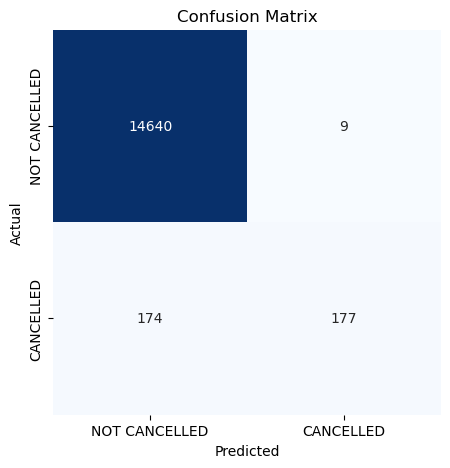

Classification Report:
 ------------------------------------------------ 
                precision    recall  f1-score   support

NOT CANCELLED       0.99      1.00      0.99     14649
    CANCELLED       0.95      0.50      0.66       351

     accuracy                           0.99     15000
    macro avg       0.97      0.75      0.83     15000
 weighted avg       0.99      0.99      0.99     15000



In [63]:
evaluate_model(model, X_test, y_test)

In [61]:
y_train.value_counts()

CANCELLED
0    34213
1      787
Name: count, dtype: int64